# Regressão - Steam store games

## Importação de Bibliotecas

In [1]:
# Bibliotecas

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Normalization

# Métricas de avaliação
from sklearn.metrics import r2_score, mean_squared_error, f1_score, mean_absolute_error, accuracy_score

# Modelos de regressão
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import sklearn.tree as SKTree

# Redes Neurais
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
# Retira os alertas no notebook para uma visualização mais limpa
import warnings
warnings.filterwarnings("ignore")

## Sobre o Dataset e leitura dos arquivos

Este dataset foi criado utilizando dados obtidos das APIs do Steam Store e SteamSpy, e fornece informações sobre vários aspectos dos jogos na loja, como gênero e número estimado de proprietários. Coletado em torno de maio de 2019, ele contém a maioria dos jogos lançados na loja até essa data. Jogos não lançados e vários softwares não relacionados a games foram removidos.

Fonte: [Kaggle - Steam Store Games](https://www.kaggle.com/datasets/nikdavis/steam-store-games?resource=download)

In [2]:
# Datasets
df_steam = pd.read_csv("data/steam/steam.csv")
df_support = pd.read_csv("data/steam/steam_support_info.csv")
df_description = pd.read_csv("data/steam/steam_description_data.csv")
df_requirements = pd.read_csv("data/steam/steam_requirements_data.csv")
df_tags = pd.read_csv("data/steam/steamspy_tag_data.csv")
df_media = pd.read_csv("data/steam/steam_media_data.csv")

## Análise Exploratoria / Pré-processamento

### Visualização e Análise de Dados Não Relevantes para a Predição

In [3]:
# Esse conjunto de dados contém as descrições de cada jogo. Essas informações não serão relevantes para a predição dos valores, pois o conteúdo textual não impacta diretamente os objetivos de previsão do modelo de regressão.
df_description.head(5)

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [4]:
# Esse conjunto de dados contém as informações dos requerimentos mínimos e máximos para rodar os jogos em cada plataforma. 
# Essas informações não serão relevantes para a predição, pois o objetivo é prever métricas específicas que não dependem dos requisitos técnicos.
df_requirements.head(5)

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [5]:
# Esse conjunto de dados possui várias tags aleatórias atribuídas pelos jogadores aos jogos. 
# Esses valores podem afetar o treinamento dos modelos de forma negativa, pois muitas tags são subjetivas e não contribuem diretamente para a previsão das variáveis de interesse.
df_tags.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Esse conjunto de dados é referente a links de vídeos, screenshots e imagens feitos pela comunidade dos jogos no Steam. Essas informações também não serão utilizadas, pois não impactam as variáveis de predição desejadas.
df_media.head(5)

,steam_appid,header_image,screenshots,background,movies
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN
2,30,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN
3,40,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN
4,50,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN


### Exploração e tratamento dos valores em df_steam

#### Visualização inicial dos dados

In [7]:
# Visualização das primeiras colunas do arquivo df_steam
df_steam.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


In [8]:
# Dados estatísticos das váriaveis númericas do conjunto de dados
df_steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [9]:
# Informações gerais do dataset
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [10]:
# Identificando o tamanho do dataset
df_steam.shape

(27075, 18)

In [11]:
# Análise de valores duplicados
df_steam.duplicated().sum()

np.int64(0)

In [12]:
# Localização de valores nulos
df_steam.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

#### Criação de coluna do ano de lançamento

Para facilitar a visualização dos lançamentos de jogos ao longo dos anos, extraiu apenas o ano da coluna `release_date` e criou uma nova coluna chamada `release_year`.

In [13]:
# Contagem de valores presentes em 'release_date'
df_steam['release_date'].value_counts()

release_date
2018-07-13    64
2018-11-16    56
2016-04-05    56
2019-01-31    56
2018-05-31    55
              ..
2019-04-26     1
2008-11-17     1
2006-06-01     1
2006-05-01     1
2005-10-27     1
Name: count, Length: 2619, dtype: int64

In [14]:
# Alterando os valores das datas e colocando somento o ano de lançamento
df_steam['release_date'] = pd.to_datetime(df_steam['release_date'])
df_steam['release_year'] = df_steam['release_date'].dt.year

In [15]:
# Exclusão da coluna original
df_steam.drop('release_date', axis=1, inplace=True)

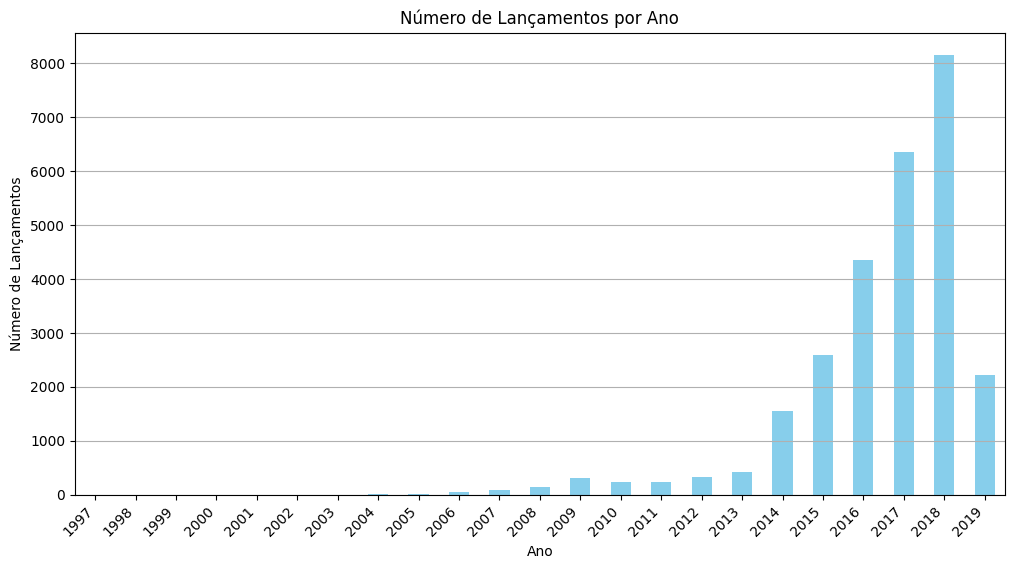

In [16]:
# Visualização da quantidade de jogos lançados ao longo dos anos
# Esse gráfico permite observar o crescimento da quantidade de lançamentos ao longo do tempo

# Contar o número de lançamentos por ano
launches_per_year = df_steam['release_year'].value_counts().sort_index()

# Plotagem do gráfico de barras
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='bar', color='skyblue')
plt.grid(axis='y')
plt.title('Número de Lançamentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### One Hot Encoding com os valores de plataforma

Para trabalhar com as diferentes plataformas (`windows`, `mac`, `linux`) em que os jogos estão disponíveis, realizou-se o processo de One Hot Encoding.

In [17]:
# Contagem de valores presentes em 'platforms'
df_steam['platforms'].value_counts()

platforms
windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [18]:
# Separando as plataformas e aplicando o one-hot encoding no df_steam
df_expanded = df_steam['platforms'].str.get_dummies(sep=';')
df_steam = pd.concat([df_steam, df_expanded], axis=1)

In [19]:
# Exclusão da coluna original após transformação
df_steam.drop('platforms', axis=1, inplace=True)

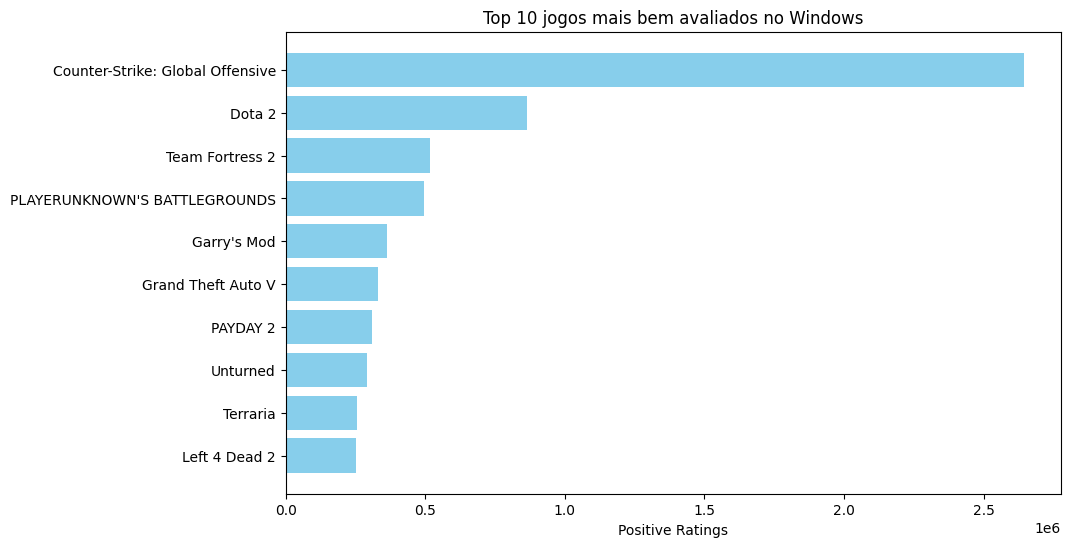

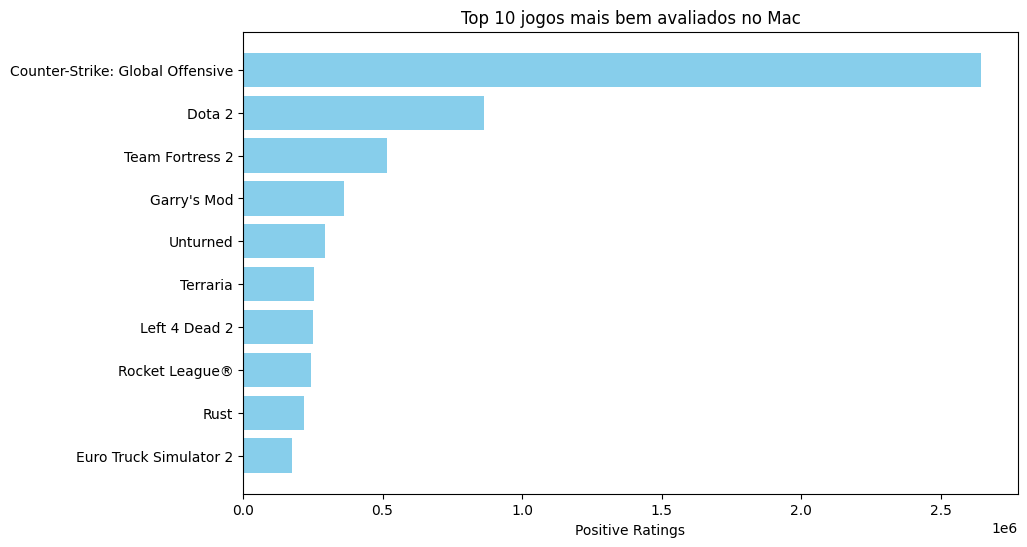

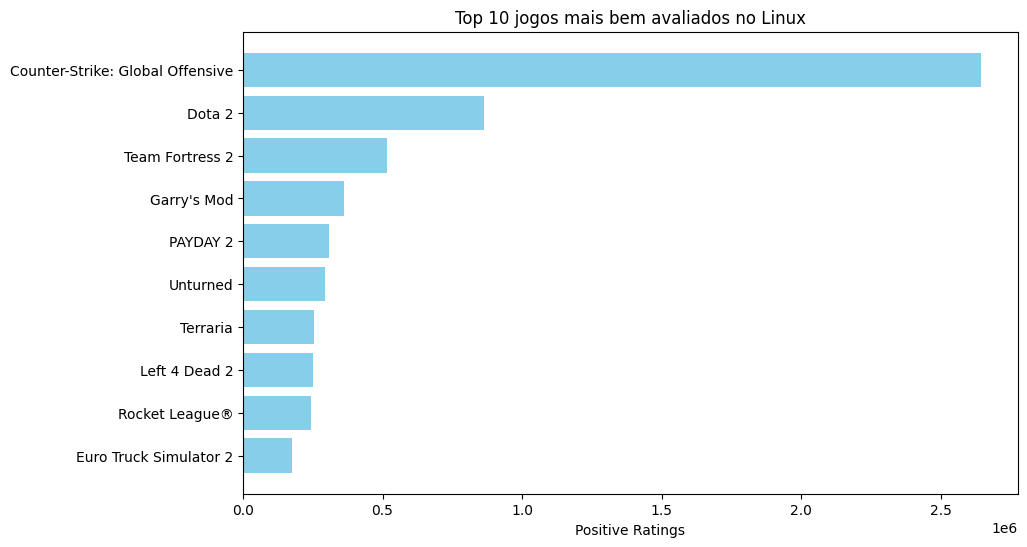

In [20]:
# Visualização dos top 10 jogos mais bem avaliados por plataforma

# Definição das plataformas para visualização
plataformas = ['windows', 'mac', 'linux']

# Criação do gráfico
for platforma in plataformas:
    # Filtro dos jogos disponíveis para cada plataforma por ordem de mais bem avaliados
    top_games = df_steam[df_steam[platforma] == 1].nlargest(10, 'positive_ratings')[['name', 'positive_ratings']]
    
    # Plotar do gráfico
    plt.figure(figsize=(10, 6))
    plt.barh(top_games['name'], top_games['positive_ratings'], color='skyblue')
    plt.xlabel('Positive Ratings')
    plt.title(f'Top 10 jogos mais bem avaliados no {platforma.capitalize()}')
    plt.gca().invert_yaxis()
    plt.show()

In [21]:
# Contagem de jogos para cada plataforma
plataformas = ['windows', 'mac', 'linux']

# Exibe a contagem de jogos por plataforma
for platforma in plataformas:
    print(df_steam[platforma].value_counts())
    print()

windows
1    27070
0        5
Name: count, dtype: int64

mac
0    19009
1     8066
Name: count, dtype: int64

linux
0    21840
1     5235
Name: count, dtype: int64



#### Média da quantidade de donos

Para facilitar a análise dos valores, extraiu-se a média dos intervalos de proprietários na coluna `owners`.

In [22]:
# Contagem de valores presentes na coluna owners
df_steam['owners'].value_counts()

owners
0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: count, dtype: int64

In [23]:
# Divisão da coluna 'owners' em duas colunas temporárias para obter os limites min e max de cada intervalo
df_steam[['min', 'max']] = df_steam['owners'].str.split('-', expand=True).astype(int)

In [24]:
# Cálculo da média de proprietários utilizando as novas colunas (min e max) e criação da coluna 'owners_avg'
df_steam['owners_avg'] = ((df_steam['min'] + df_steam['max']) / 2).astype(int)

In [25]:
# Exclusão das colunas temporárias e da coluna original
df_steam.drop(columns=['min', 'max', 'owners'], inplace=True)

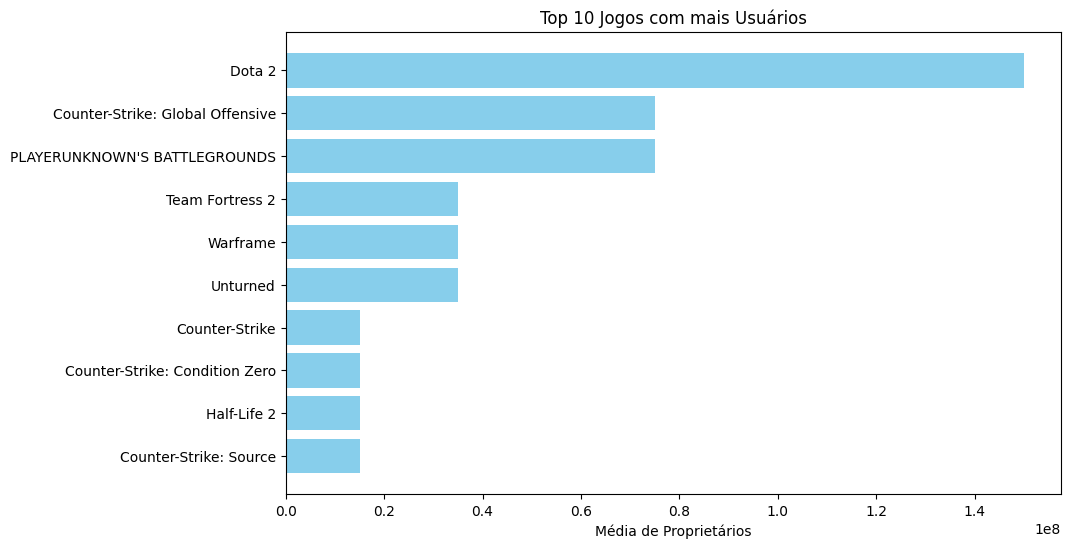

In [26]:
# Seleção dos 10 jogos com a maior média de proprietários
top_games = df_steam.nlargest(10, 'owners_avg')[['name', 'owners_avg']]
plt.figure(figsize=(10, 6))
plt.barh(top_games['name'], top_games['owners_avg'], color='skyblue')
plt.xlabel('Média de Proprietários')
plt.title('Top 10 Jogos com mais Usuários')
plt.gca().invert_yaxis()
plt.show()

In [27]:
# Visualização da distribuição dos valores na coluna 'owners_avg'
df_steam['owners_avg'].value_counts()

owners_avg
10000        18596
35000         3059
75000         1695
150000        1386
350000        1272
750000         513
1500000        288
3500000        193
7500000         46
15000000        21
35000000         3
75000000         2
150000000        1
Name: count, dtype: int64

#### Redução da quantidade de valores presentes na coluna genres

Simplificação dos valores presentes na coluna `genres` e conversão para valores númericos.

In [28]:
# Contagem dos gêneros presentes na coluna 'genres'
df_steam["genres"].value_counts()

genres
Action;Indie                                                        1852
Casual;Indie                                                        1482
Action;Adventure;Indie                                              1229
Adventure;Indie                                                     1170
Action;Casual;Indie                                                 1004
                                                                    ... 
Casual;Free to Play;Indie;Racing;Strategy                              1
Free to Play;Indie;RPG;Early Access                                    1
Action;Adventure;Indie;Massively Multiplayer;Simulation;Strategy       1
Indie;Massively Multiplayer;Racing;Simulation                          1
Action;Adventure;Indie;Racing;RPG                                      1
Name: count, Length: 1552, dtype: int64

In [29]:
# Divisão da coluna 'genres' e retenção do primeiro gênero para casos com múltiplos valores
split_genres = df_steam["genres"].str.split(";", n=2, expand=True)
df_steam["genres"] = split_genres[0]

In [30]:
# Obtenção dos valores únicos da coluna 'genres'
unique_genres = df_steam['genres'].unique()

# Criação de um dicionário para mapear cada gênero único a um valor numérico
genre_mapping = {genre: idx for idx, genre in enumerate(unique_genres, start=1)}

# Aplicação do mapeamento na coluna 'genres' para substituir os gêneros por valores numéricos
df_steam['genres_numeric'] = df_steam['genres'].map(genre_mapping)

In [31]:
# Visualização do resultado obtido
# Obter as contagens para 'genres' e 'genres_numeric'
genres_counts = df_steam['genres'].value_counts()
genres_numeric_counts = df_steam['genres_numeric'].value_counts()

# Criação de um DataFrame para visualizar o mapeamento de gêneros e suas contagens
genres_mapping_df = pd.DataFrame({
    'genres': genres_counts.index,
    'genres_numeric': genres_counts.index.map(lambda x: genres_numeric_counts[genre_mapping[x]] if genre_mapping[x] in genres_numeric_counts.index else None)
})

# Exibir a tabela resultante
genres_mapping_df

,genres,genres_numeric
0,Action,11212
1,Adventure,5256
2,Casual,4373
3,Indie,2623
4,Violent,709
5,Simulation,631
6,Strategy,532
7,RPG,407
8,Free to Play,395
9,Sexual Content,245


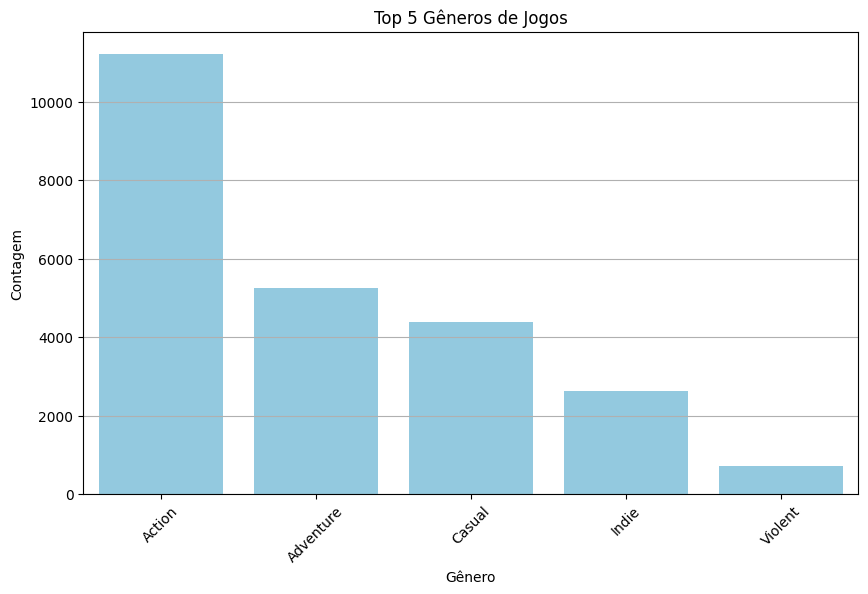

In [32]:
# Seleção dos 5 gêneros mais comuns no dataset
top_genres = df_steam['genres'].value_counts().head(5)

# Gráfico de barras para visualizar os 5 gêneros de jogos mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, color='skyblue')
plt.title('Top 5 Gêneros de Jogos')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Redução da quantidade de valores presentes na coluna categories

Reclassificação dos valores presentes em `categories` em dois grupos, `is_multi_player` e `is_single_player`

In [33]:
# Contagem dos diferentes valores presentes na coluna 'categories'
df_steam['categories'].value_counts()

categories
Single-player                                                                                                           6110
Single-player;Steam Achievements                                                                                        2334
Single-player;Steam Achievements;Steam Trading Cards                                                                     848
Single-player;Partial Controller Support                                                                                 804
Single-player;Steam Trading Cards                                                                                        792
                                                                                                                        ... 
Online Multi-Player;Cross-Platform Multiplayer;Steam Achievements;Steam Workshop;Stats;Includes level editor               1
Online Multi-Player;Steam Achievements;Stats                                                                      

In [34]:
# Reclassificação dos valores de 'categories' como 'Multi-player' ou 'Single-player'
df_steam['categories'] = df_steam['categories'].apply(
    lambda x: 'Multi-player' if 'Multi-player' in x else 'Single-player'
)

In [35]:
# Exibição da contagem de valores na nova coluna após reclassificação
df_steam['categories'].value_counts()

categories
Single-player    23101
Multi-player      3974
Name: count, dtype: int64

In [36]:
# Criação das colunas binárias para indicar a presença de cada categoria
df_steam['is_multi_player'] = df_steam['categories'].apply(lambda x: 1 if x == 'Multi-player' else 0)
df_steam['is_single_player'] = df_steam['categories'].apply(lambda x: 1 if x == 'Single-player' else 0)

In [37]:
# Remoção da coluna original
df_steam.drop(columns=['categories'], inplace=True)

#### Tratmento em `developer` e `publisher`

Para facilitar a análise, convertendo as informações categóricas em `developer` e `publisher` para valores numéricos.

In [38]:
# Contagem dos diferentes valores presentes na coluna 'developer'
df_steam['developer'].value_counts()

developer
Choice of Games                    94
KOEI TECMO GAMES CO., LTD.         72
Ripknot Systems                    62
Laush Dmitriy Sergeevich           51
Nikita "Ghost_RUS"                 50
                                   ..
Black Element                       1
Neversoft                           1
Mark Healey                         1
Valve;Hidden Path Entertainment     1
Adept Studios GD                    1
Name: count, Length: 17112, dtype: int64

In [39]:
# Conversão dos valores na coluna 'developer' em valores numéricos usando factorize
df_steam['developer_numeric'] = pd.factorize(df_steam['developer'])[0]

In [40]:
# Contagem dos diferentes valores presentes na coluna 'publisher'
df_steam['publisher'].value_counts()

publisher
Big Fish Games      212
Strategy First      136
Ubisoft             111
THQ Nordic           98
Square Enix          97
                   ... 
LikeVR                1
Suspicious Ducks      1
Kaleido, Inc.         1
Dedbat Studios        1
the original air      1
Name: count, Length: 14353, dtype: int64

In [41]:
# Conversão dos valores na coluna 'publisher' em valores numéricos usando factorize
df_steam['publisher_numeric'] = pd.factorize(df_steam['publisher'])[0]

#### Tramento das tags dos jogos em `steamspy_tags`

Os valores presentes `steamspy_tags` são os mesmos apresentados em df_tags. Para incluí-los na análise, eles serão convertidos para valores numéricos.

In [42]:
# Exibe a contagem de valores únicos na coluna 'steamspy_tags'
df_steam["steamspy_tags"].value_counts()

steamspy_tags
Action;Indie;Casual               845
Action;Adventure;Indie            714
Early Access;Action;Indie         507
Adventure;Indie;Casual            442
Indie;Casual                      378
                                 ... 
RPG;Turn-Based Combat;RPGMaker      1
Sexual Content;Nudity;Sports        1
Racing;Time Attack                  1
Adventure;Indie;Science             1
Casual;Indie;Hand-drawn             1
Name: count, Length: 6423, dtype: int64

In [43]:
# Calcular o número de tags em cada linha e obter o valor máximo e mínimo
max_tags = df_steam['steamspy_tags'].str.split(';').apply(len).max()
min_tags = df_steam['steamspy_tags'].str.split(';').apply(len).min()

print("Número máximo de tags:", max_tags)
print("Número mínimo de tags:", min_tags)

Número máximo de tags: 3
Número mínimo de tags: 1


In [44]:
# Dividir as tags em três colunas
tags_split = df_steam['steamspy_tags'].str.split(';', expand=True)
df_steam['tag_1'] = tags_split[0]
df_steam['tag_2'] = tags_split[1]
df_steam['tag_3'] = tags_split[2]

In [45]:
# Substituição de valores None por 'Unknown'
df_steam['tag_1'].fillna('Unknown', inplace=True)
df_steam['tag_2'].fillna('Unknown', inplace=True)
df_steam['tag_3'].fillna('Unknown', inplace=True)

In [46]:
# Concatenar todas as tags em uma única coluna temporária para codificação
all_tags = pd.concat([df_steam['tag_1'], df_steam['tag_2'], df_steam['tag_3']], axis=0).unique()

# Criação do LabelEncoder e ajuste com todas as tags únicas
label_encoder = LabelEncoder()
label_encoder.fit(all_tags)

# Aplicação da codificação para cada coluna de tags, garantindo que a mesma tag tenha o mesmo código
df_steam['tag_1'] = label_encoder.transform(df_steam['tag_1'])
df_steam['tag_2'] = label_encoder.transform(df_steam['tag_2'])
df_steam['tag_3'] = label_encoder.transform(df_steam['tag_3'])

In [47]:
# Filtrar as linhas onde "Action" aparece na coluna steamspy_tags
df_action_tags = df_steam[df_steam['steamspy_tags'].str.contains('Action', na=False)]

# Visualização do resultado obtido
print(df_action_tags[['steamspy_tags', 'tag_1', 'tag_2', 'tag_3']])

                   steamspy_tags  tag_1  tag_2  tag_3
0         Action;FPS;Multiplayer     13    101    181
1         Action;FPS;Multiplayer     13    101    181
3         Action;FPS;Multiplayer     13    101    181
4              FPS;Action;Sci-fi    101     13    249
5         Action;FPS;Multiplayer     13    101    181
...                          ...    ...    ...    ...
27062        Action;Indie;Casual     13    139     49
27063  Early Access;Action;Indie     94     13    139
27065  Early Access;Action;Indie     94     13    139
27071     Action;Indie;Adventure     13    139     16
27072        Action;Indie;Casual     13    139     49

[10344 rows x 4 columns]


#### Visalização dos valores nas demais colunas

Verificação das informações nas colunas que ainda não passaram por tratamento.

In [48]:
# Exibe a contagem de valores únicos na coluna 'required_age'
# Essa coluna representa a faixa etária destinada ao jogo, onde 0 é livre e os demais valores indicam restrições de idade.
df_steam["required_age"].value_counts()

required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: count, dtype: int64

In [49]:
# Exibe a contagem de valores únicos na coluna 'achievements'
# Número de conquistas disponíveis para cada jogo.
df_steam["achievements"].value_counts()

achievements
0       11864
10        679
12        618
20        574
15        490
        ...  
196         1
4981        1
3340        1
574         1
510         1
Name: count, Length: 410, dtype: int64

In [50]:
# Exibe a contagem de valores únicos na coluna 'name'
# Nome do jogo; apesar de ser um identificador textual, a coluna 'appid' já fornece um identificador numérico exclusivo.
df_steam["name"].value_counts()

name
Dark Matter              3
Surge                    2
Zombie Apocalypse        2
The Great Escape         2
Escape                   2
                        ..
Left 4 Dead              1
Left 4 Dead 2            1
Dota 2                   1
Portal 2                 1
Team Fortress Classic    1
Name: count, Length: 27033, dtype: int64

In [51]:
# Exibe a contagem de valores únicos na coluna 'english'
# Indica se o jogo está disponível em inglês (1 para sim, 0 para não).
df_steam["english"].value_counts()

english
1    26564
0      511
Name: count, dtype: int64

In [52]:
# Exibe a contagem de valores únicos na coluna 'positive_ratings'
# Quantidade de avaliações positivas feitas pelos usuários.
df_steam["positive_ratings"].value_counts()

positive_ratings
1        1484
2        1151
3        1097
4         896
5         762
         ... 
3822        1
12120       1
27755       1
2758        1
1273        1
Name: count, Length: 2800, dtype: int64

In [53]:
# Exibe a contagem de valores únicos na coluna 'negative_ratings'
# Quantidade de avaliações negativas feitas pelos usuários.
df_steam["negative_ratings"].value_counts()

negative_ratings
0       2906
1       2748
2       1907
3       1503
4       1182
        ... 
1210       1
1053       1
2419       1
1100       1
684        1
Name: count, Length: 1492, dtype: int64

In [54]:
# Exibe a contagem de valores únicos na coluna 'average_playtime'
# Média de horas jogadas por jogo.
df_steam["average_playtime"].value_counts()

average_playtime
0        20905
1          156
3           73
2           58
9           56
         ...  
841          1
43632        1
459          1
1541         1
1300         1
Name: count, Length: 1345, dtype: int64

In [55]:
# Exibe a contagem de valores únicos na coluna 'median_playtime'
# Mediana de horas jogadas por jogo.
df_steam["median_playtime"].value_counts()

median_playtime
0       20905
1         155
3          72
2          52
9          48
        ...  
5759        1
3575        1
1207        1
554         1
812         1
Name: count, Length: 1312, dtype: int64

In [56]:
# Exibe a contagem de valores únicos na coluna 'price'
# Preço dos jogos em 2019 (em libras).
df_steam["price"].value_counts()

price
3.99     3211
0.79     2892
0.00     2560
6.99     2050
7.19     1304
         ... 
3.15        1
15.40       1
6.54        1
1.80        1
6.10        1
Name: count, Length: 282, dtype: int64

#### Visualização de df_steam após tratamento dos dados

In [57]:
df_steam.head()

,appid,name,english,developer,publisher,required_age,genres,steamspy_tags,achievements,positive_ratings,...,windows,owners_avg,genres_numeric,is_multi_player,is_single_player,developer_numeric,publisher_numeric,tag_1,tag_2,tag_3
0,10,Counter-Strike,1,Valve,Valve,0,Action,Action;FPS;Multiplayer,0,124534,...,1,15000000,1,1,0,0,0,13,101,181
1,20,Team Fortress Classic,1,Valve,Valve,0,Action,Action;FPS;Multiplayer,0,3318,...,1,7500000,1,1,0,0,0,13,101,181
2,30,Day of Defeat,1,Valve,Valve,0,Action,FPS;World War II;Multiplayer,0,3416,...,1,7500000,1,1,0,0,0,101,336,181
3,40,Deathmatch Classic,1,Valve,Valve,0,Action,Action;FPS;Multiplayer,0,1273,...,1,7500000,1,1,0,0,0,13,101,181
4,50,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Action,FPS;Action;Sci-fi,0,5250,...,1,7500000,1,1,0,1,0,101,13,249


### Exploração dos valores em df_support

In [58]:
# Esse conjunto de dados contém informações sobre o suporte oferecido pelos desenvolvedores para cada jogo
df_support.head()

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


In [59]:
df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   steam_appid    27136 non-null  int64 
 1   website        18015 non-null  object
 2   support_url    16479 non-null  object
 3   support_email  23500 non-null  object
dtypes: int64(1), object(3)
memory usage: 848.1+ KB


In [60]:
# Unificando as informações das três colunas de suporte em uma única coluna indicando se o jogo possui suporte
# Criar a coluna 'support' com valor 1 se qualquer uma das colunas de suporte não for nula, caso contrário, 0
df_support['support'] = df_support[['website', 'support_url', 'support_email']].notnull().any(axis=1).astype(int)

In [61]:
# Removendo as colunas originais de suporte após a unificação
df_support.drop(['website','support_url', 'support_email'], axis=1, inplace=True)

#### Visualização de df_support após tratamento dos dados

In [62]:
df_support.head()

,steam_appid,support
0,10,1
1,30,1
2,50,1
3,70,1
4,80,1


### Combinação dos datasets e ajuste final das colunas para análise

União dos datasets `df_steam` e `df_support` em um único DataFrame.

In [63]:
# Junção dos datasets df_steam e df_support em um único DataFrame
df_merged = pd.merge(df_steam, df_support, left_on='appid', right_on='steam_appid', how='left')

In [64]:
# Exclusão de colunas desnecessárias após a junção
df_merged = df_merged.drop(['appid', 'steamspy_tags', 'steam_appid'], axis = 1)

In [65]:
# Substituição de valores nulos na coluna 'support' por 0, para garantir consistência ao exportar o dataset
df_merged['support'] = df_merged['support'].fillna(0).astype(int)

In [66]:
# DataFrame resultante
df_merged.head()

,name,english,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,...,owners_avg,genres_numeric,is_multi_player,is_single_player,developer_numeric,publisher_numeric,tag_1,tag_2,tag_3,support
0,Counter-Strike,1,Valve,Valve,0,Action,0,124534,3339,17612,...,15000000,1,1,0,0,0,13,101,181,1
1,Team Fortress Classic,1,Valve,Valve,0,Action,0,3318,633,277,...,7500000,1,1,0,0,0,13,101,181,0
2,Day of Defeat,1,Valve,Valve,0,Action,0,3416,398,187,...,7500000,1,1,0,0,0,101,336,181,1
3,Deathmatch Classic,1,Valve,Valve,0,Action,0,1273,267,258,...,7500000,1,1,0,0,0,13,101,181,0
4,Half-Life: Opposing Force,1,Gearbox Software,Valve,0,Action,0,5250,288,624,...,7500000,1,1,0,1,0,101,13,249,1


### Corelação entre os valores

Análise de correlação entre as colunas numéricas selecionadas para identificar relações entre as variáveis.

In [67]:
# Seleção das colunas numéricas para análise de correlação
numeric_cols = ['required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners_avg', 'developer_numeric',
                'price', 'support', 'release_year', 'linux', 'mac', 'windows', 'is_multi_player', 'is_single_player', 'genres_numeric', 'english', 'publisher_numeric', 'tag_1','tag_2','tag_3']

In [68]:
# Criação de um DataFrame contendo apenas as colunas numéricas selecionadas
df_numeric = df_merged[numeric_cols]

In [69]:
# Gerar a matriz de correlação para as colunas numéricas
corr_matrix = df_numeric.corr()

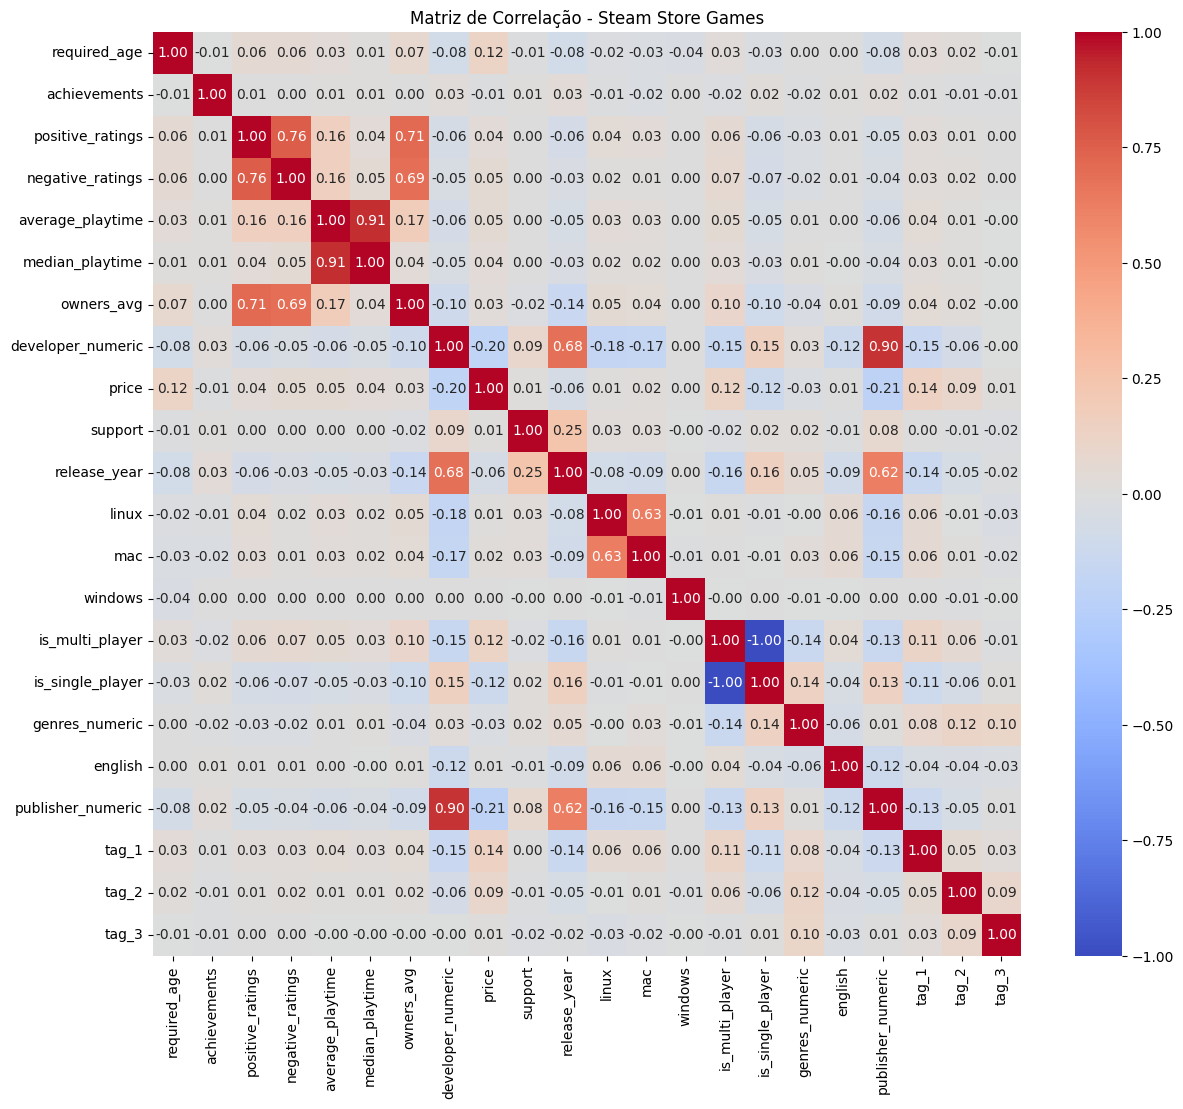

In [70]:
# Plotar a matriz de correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Steam Store Games')
plt.show()

## Modelos de Regressão

### Gráficos auxiliares

Funções de visualização para auxiliar na análise do desempenho dos modelos de regressão.

In [71]:
def plot_loss(history, modelo):
    """
    Plota o histórico de erro (loss) durante o treinamento de modelos de regressão,
    exibindo tanto o erro de treinamento quanto o erro de validação ao longo das épocas.

    Parâmetros:
    history -- objeto History ou dicionário contendo os históricos de 'loss' e 'val_loss' por época,
               utilizado para avaliar o desempenho do modelo ao longo do treinamento
    modelo -- nome do modelo utilizado (string) para exibir no título do gráfico
    """
    # Plotar a perda de treinamento
    plt.plot(history.history['loss'], label='Erro de Treinamento')
    # Plotar a perda de validação
    plt.plot(history.history['val_loss'], label='Erro de Validação')
    
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.title(f'Erro de Treinamento e Validação - {modelo}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [72]:
def plot_regression_scatter(y_test, y_predict, modelo):
    """
    Plota um gráfico de dispersão para os modelos utilizados, comparando os valores reais e preditos.

    Parâmetros:
    y_test -- valores reais de teste
    y_predict -- valores preditos pelo modelo
    modelo -- nome do modelo utilizado (string) para exibir no título do gráfico
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_predict, alpha=0.6, label='Predições do Modelo')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Linha Ideal (y = x)')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title(f'Valores Reais vs. Valores Preditos - {modelo}')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [73]:
def plot_decision_tree_accuracy(history_mse_train, history_mse_test):
    """
    Plota o histórico de erro quadrático médio (MSE) para o modelo de árvore de decisão,
    mostrando a precisão em relação à profundidade máxima (max_depth) da árvore.

    Parâmetros:
    history_mse_train -- lista contendo os valores de erro quadrático médio para o conjunto de treinamento
    history_mse_test -- lista contendo os valores de erro quadrático médio para o conjunto de teste
    """
    plt.plot(history_mse_train, label='Treinamento')
    plt.plot(history_mse_test, label='Validação')
    
    plt.title('Precisão do Modelo - Árvore de Decisão')
    plt.ylabel('Erro Quadrático Médio (MSE)')
    plt.xlabel('Profundidade Máxima (max_depth)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


### Regressão Linear

Treinamento de um modelo de regressão linear para prever a mediana do tempo de jogo (`median_playtime`)

In [74]:
# Seleção dos dados a serem utilizados nesse processo
# As variáveis presentes foram escolhidas como preditores pois, conforme indicado na análise de correlação,
# elas apresentaram uma correlação alta com a variável alvo em comparação com as outras variáveis
X = df_merged[['average_playtime', 'positive_ratings', 'negative_ratings', 'owners_avg', 'price', 'is_multi_player']]
y = df_merged['median_playtime']

In [75]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Normalização dos dados
normalizer = Normalization()
normalizer.adapt(X_train.to_numpy())

In [77]:
# Treinamento do modelo de regressão linear
lr = LinearRegression()

lr.fit(X_train,y_train)

y_predict = lr.predict(X_test)
y_predict

array([ -7.51098692,  88.20429666, 397.96417226, ..., -34.35686468,
       -27.12576536, -11.01713012])

In [78]:
# Configuração do modelo de rede neural para regressão
model = keras.Sequential([normalizer, layers.Dense(1)])

model.summary()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (21660, 6)             │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [79]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 111.1664 - val_loss: 115.5512
Epoch 2/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - loss: 108.1952 - val_loss: 114.1050
Epoch 3/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 140.7996 - val_loss: 113.0669
Epoch 4/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 115.3993 - val_loss: 112.0261
Epoch 5/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 112.4389 - val_loss: 110.9596
Epoch 6/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 109.8472 - val_loss: 110.0564
Epoch 7/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 109.7410 - val_loss: 109.0226
Epoch 8/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 99.4144 - val_loss: 107.8786
Epoch 9/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 102.0758 - val_loss: 106.7809
Epoch 10/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - loss: 104.3364 - val_loss: 105.7221
Epoch 11/50
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 103.3781 - val_loss

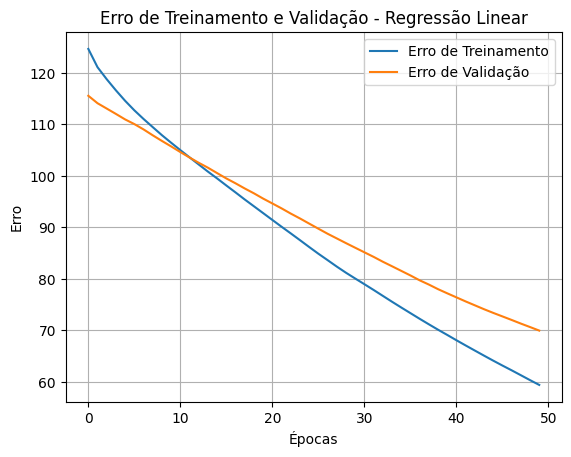

In [80]:
# Visualização do histórico de treinamento e validação
plot_loss(history, modelo='Regressão Linear')

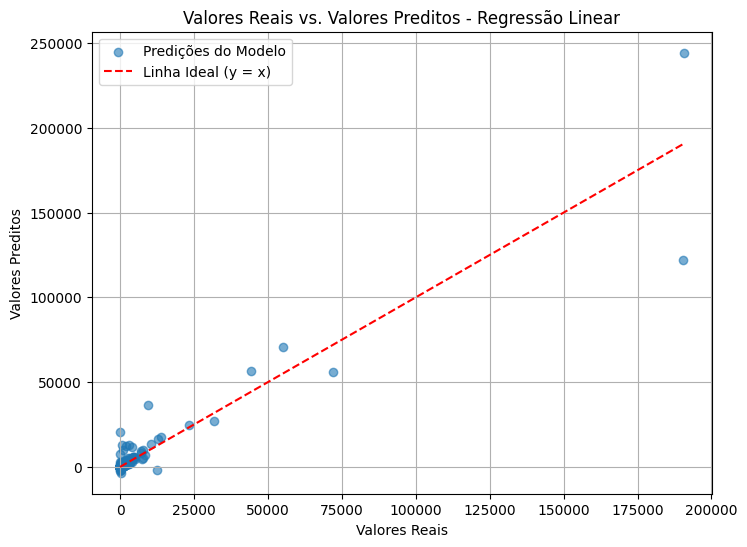

In [81]:
# Gráfico de dispersão para a regressão linear
plot_regression_scatter(y_test, y_predict, "Regressão Linear")

In [82]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
MSE:  3656715.7251286684
R2:  0.7692787051200867


### Árvore de Decisão

Predição do número médio de proprietários (`owners_avg`) usando um modelo de árvore de decisão

In [83]:
# Seleção dos dados a serem utilizados nesse processo
# As variáveis presentes foram escolhidas como preditores pois, conforme indicado na análise de correlação,
# elas apresentaram uma correlação alta com a variável alvo em comparação com as outras variáveis
X = df_merged[['average_playtime', 'positive_ratings', 'negative_ratings']]
y = df_merged['owners_avg']

In [84]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Inicialização das listas para armazenar o histórico do erro quadrático médio (MSE)
history_mse_train = []
history_mse_test = []

In [86]:
# Treinamento e avaliação do modelo com diferentes profundidades de árvore
for max_depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    history_mse_train.append(mean_squared_error(y_train, train_pred))
    history_mse_test.append(mean_squared_error(y_test, test_pred))

[Text(0.8518458549222798, 0.95, 'x[1] <= 689693.0\nsquared_error = 1814210996415.688\nsamples = 21660\nvalue = 134201.293'),
 Text(0.7367227979274611, 0.85, 'x[1] <= 63533.5\nsquared_error = 518461208055.965\nsamples = 21658\nvalue = 123824.915'),
 Text(0.7942843264248705, 0.8999999999999999, 'True  '),
 Text(0.522020725388601, 0.75, 'x[1] <= 5247.5\nsquared_error = 217133330342.162\nsamples = 21615\nvalue = 103784.409'),
 Text(0.3134715025906736, 0.65, 'x[1] <= 1335.5\nsquared_error = 41122899505.245\nsamples = 21094\nvalue = 58059.164'),
 Text(0.16580310880829016, 0.55, 'x[2] <= 74.5\nsquared_error = 7955478471.951\nsamples = 20182\nvalue = 37164.553'),
 Text(0.08290155440414508, 0.45, 'x[0] <= 0.5\nsquared_error = 2278169050.81\nsamples = 17786\nvalue = 20371.922'),
 Text(0.04145077720207254, 0.35, 'x[1] <= 105.5\nsquared_error = 508872958.824\nsamples = 15867\nvalue = 14524.485'),
 Text(0.02072538860103627, 0.25, 'x[2] <= 25.5\nsquared_error = 146860000.034\nsamples = 14449\nvalue 

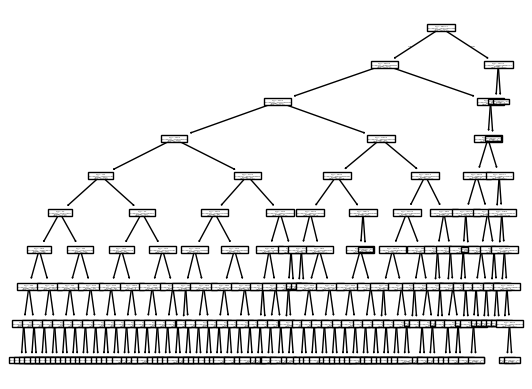

In [87]:
# Visualização da árvore de decisão treinada
SKTree.plot_tree(model)

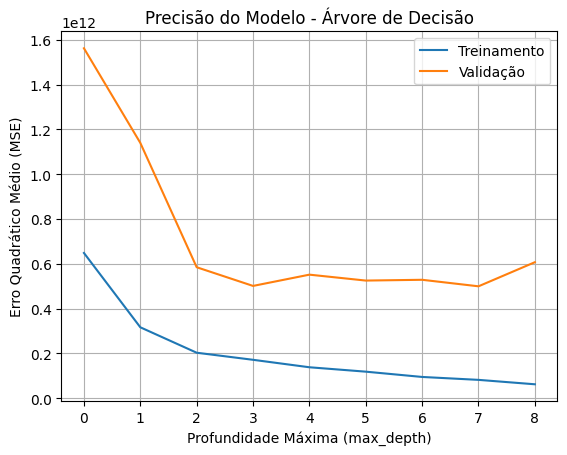

In [88]:
# Gráfico do histórico de MSE para o modelo de árvore de decisão
plot_decision_tree_accuracy(history_mse_train, history_mse_test)

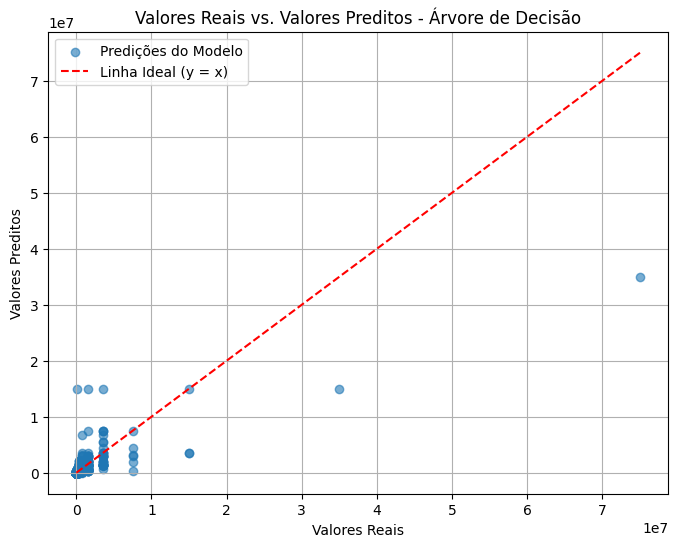

In [89]:
# Gráfico de dispersão para Árvore de Decisão
plot_regression_scatter(y_test, test_pred, "Árvore de Decisão")

In [90]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, test_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))


R² Score: 0.611362885351213
MAE:  86044.38465298539


### Redes Neurais

Utilizando Redes neurais para predizer o preço (`price`) dos jogos da Steam

In [91]:
# Seleção dos dados a serem utilizados nesse processo
# As variáveis presentes foram escolhidas como preditores pois, conforme indicado na análise de correlação,
# elas apresentaram uma correlação alta com a variável alvo em comparação com as outras variáveis
X = df_merged[['required_age','negative_ratings','is_multi_player', 'tag_1','tag_2']]
y = df_merged['price']

In [92]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Normalização dos dados para melhor desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Aleatorização dos dados
np.random.seed(1)

tf.random.set_seed(1)

In [95]:
# Rede Neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,545 (205.25 KB)

 Trainable params: 52,545 (205.25 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=35, batch_size=42, validation_split=0.2, verbose=1)

Epoch 1/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55.2705 - val_loss: 50.1559
Epoch 2/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.3830 - val_loss: 50.0439
Epoch 3/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.1728 - val_loss: 48.8749
Epoch 4/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.8398 - val_loss: 48.2951
Epoch 5/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.5190 - val_loss: 47.2186
Epoch 6/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.1294 - val_loss: 46.3487
Epoch 7/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.7894 - val_loss: 45.8191
Epoch 8/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.5260 - val_loss: 45.4351
Epoch 9/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.2945 - val_loss: 45.2160
Epoch 10/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.1379 - val_loss: 44.8447
Epoch 11/35
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43.9174 - val_loss: 44.6251
Epoch 12/35
413/413 ━━━━━━━━━━

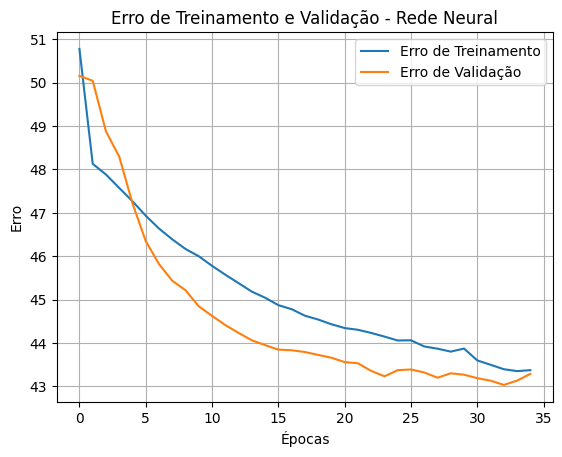

In [97]:
# Visualização do histórico de treinamento e validação
plot_loss(history, modelo = 'Rede Neural')

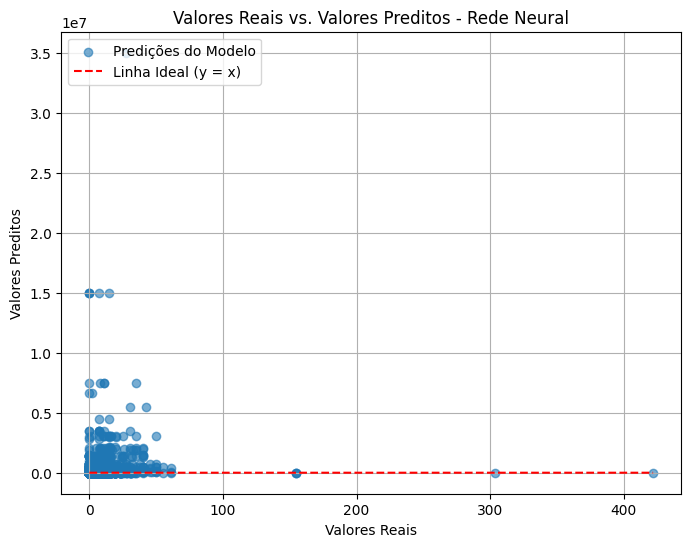

In [98]:
# Gráfico de dispersão para a rede neural
plot_regression_scatter(y_test, y_pred, "Rede Neural")

In [99]:
# Cálculo da média dos valores reais e preditos para análise de discrepância
print("Média dos valores reais:", y_test.mean())
print("Média dos valores preditos:", y_pred.mean())

Média dos valores reais: 6.213588180978763
Média dos valores preditos: 134129.09699968097


In [100]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: " , mean_squared_error(y_test, y_pred))
print(f'Erro quadrático médio no conjunto de teste: {model.evaluate(X_test_scaled, y_test)}')

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE:  314.6674598533123
MSE:  316462.5273709793
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 115.4277
Erro quadrático médio no conjunto de teste: 95.6669692993164
